In [491]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [492]:
df = pd.read_csv('data 2.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [493]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [494]:
df = df.drop(columns=['id', 'Unnamed: 32'])

In [495]:
df.loc[df['diagnosis'] == 'M', 'diagnosis'] = 1
df.loc[df['diagnosis'] == 'B', 'diagnosis'] = 0

In [496]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [497]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Keep rows within 1.5 * IQR range for all numeric columns
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index(drop=True)


In [498]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [499]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [500]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [501]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
1,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
2,1,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
3,1,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,...,20.42,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
4,1,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242
394,0,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283
395,0,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
396,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321


In [502]:
x_train

array([[ 0.15889425,  1.36386361,  0.13622457, ..., -0.70424624,
        -0.26796774, -1.23363867],
       [-1.13278781, -0.88086898, -1.16604707, ..., -1.96150475,
        -0.15990729, -1.3553258 ],
       [-0.03757519,  0.45503336,  0.06074849, ...,  1.11060415,
         2.2059267 ,  1.82714155],
       ...,
       [-0.23822483, -0.27932231, -0.20341777, ..., -0.25331337,
        -1.81989966, -0.66628209],
       [ 0.62707674,  0.43680468,  0.60516609, ...,  0.13255339,
        -0.94392031, -1.01816718],
       [ 0.66887875,  0.31962026,  0.5668094 , ..., -0.77672495,
        -0.30705343, -1.41655691]])

In [503]:
x_test

array([[-1.19549082,  1.18678494, -1.20564108, ..., -1.3180503 ,
        -1.2704008 , -0.88020342],
       [ 0.28430027,  2.24404878,  0.31192298, ...,  0.19638407,
        -1.21752016,  0.31651592],
       [-0.28838724,  1.3820923 , -0.2256894 , ...,  1.57183229,
         1.38742631,  1.85814465],
       ...,
       [-1.66074718,  0.8196071 , -1.64488709, ..., -1.43356325,
        -0.9278262 ,  1.00245932],
       [ 0.28012007, -0.66472883,  0.21293796, ..., -0.42689164,
        -0.12541992, -0.5259931 ],
       [-1.01574219,  0.01494078, -0.98663672, ..., -0.33752869,
        -1.215221  , -0.14000461]])

In [504]:
y_train = (y_train.to_numpy()).astype(int)
y_test = y_test.to_numpy().astype(int)

In [505]:
y_train

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [506]:
y_train 

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [507]:
from sklearn.model_selection import GridSearchCV

In [508]:
params_rbf = {
    'kernel' : ['rbf'],
    'C' : [1.0, 2.0, 4.0, 7.0, 12.0],
    'gamma' : ['scale', 'auto', 1.0, 5.0, 12.0]
}

params_lin = {
    'kernel' : ['linear'],
    'C' : [0.1, 1, 10, 100],
    'gamma' : ['scale', 'auto', 0.01, 0.1, 1]
}


In [509]:
from sklearn.svm import SVC

In [510]:
cv_rbf = GridSearchCV(SVC(), param_grid=params_rbf, scoring='accuracy', cv = 10)
cv_lin = GridSearchCV(SVC(), param_grid=params_lin, scoring='accuracy', cv = 10)

In [511]:
cv_rbf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1.0, 2.0, 4.0, 7.0, 12.0],
                         'gamma': ['scale', 'auto', 1.0, 5.0, 12.0],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [512]:
cv_lin.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1],
                         'kernel': ['linear']},
             scoring='accuracy')

In [513]:
print(cv_rbf.best_estimator_)
print(cv_lin.best_estimator_)

SVC(C=2.0)
SVC(C=1, kernel='linear')


In [514]:
print(cv_rbf.best_params_)
print(cv_lin.best_params_)


{'C': 2.0, 'gamma': 'scale', 'kernel': 'rbf'}
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [515]:
y_pred_rbf = cv_rbf.best_estimator_.predict(x_test)
y_pred_lin = cv_lin.best_estimator_.predict(x_test)

In [516]:
from sklearn.model_selection import cross_val_score
scores_rbf = cross_val_score(cv_rbf.best_estimator_, x_train, y_train, cv=10)
print("Cross-validation accuracy scores for rbf kernel: ", scores_rbf)
print("Mean CV Accuracy for rbf kernel: ", np.mean(scores_rbf))

Cross-validation accuracy scores for rbf kernel:  [1.         0.96428571 1.         0.96428571 0.92857143 1.
 0.96428571 0.92857143 0.96296296 1.        ]
Mean CV Accuracy for rbf kernel:  0.9712962962962963


In [517]:
scores_lin = cross_val_score(cv_lin.best_estimator_, x_train, y_train, cv=10)
print("Cross-validation accuracy scores for linear kernel: ", scores_lin)
print("Mean CV Accuracy for linear kernel: ", np.mean(scores_lin))

Cross-validation accuracy scores for linear kernel:  [0.96428571 1.         0.96428571 0.96428571 1.         0.96428571
 0.92857143 0.92857143 0.96296296 1.        ]
Mean CV Accuracy for linear kernel:  0.9677248677248679


In [518]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [519]:
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [527]:
x_train_pca = scaler.fit_transform(x_train_pca)
x_test_pca = scaler.transform(x_test_pca)
x_train_pca

array([[-0.10776652, -0.69067004],
       [-1.50247138, -0.036521  ],
       [ 1.00639356,  0.77777296],
       [-0.54391213, -0.50847368],
       [-0.89790037, -0.54964485],
       [ 0.26056972, -0.73813452],
       [ 0.45032497,  1.14640114],
       [-0.69682943, -0.56281139],
       [ 0.80563493,  0.53599203],
       [-0.2060439 ,  1.39556998],
       [ 1.17004186, -1.23471505],
       [-1.16308785,  0.48860092],
       [-0.7213848 ,  0.20797298],
       [ 0.88578938, -1.76189744],
       [-0.97788645,  0.2455897 ],
       [-0.69707256,  0.04205507],
       [-0.83899095,  0.10260611],
       [ 0.19148078, -2.69823132],
       [-1.09220934, -0.61656579],
       [-0.02726453,  1.19036617],
       [-0.9099976 , -0.1339355 ],
       [-0.36781927, -0.2969302 ],
       [-0.28589028,  0.72419539],
       [-0.30494938, -0.58520537],
       [-0.82803535, -0.77127772],
       [-1.48151876, -0.10891339],
       [ 0.51521682, -0.59629504],
       [ 1.94331131,  0.73476777],
       [-0.69320274,

In [521]:
cv_rbf.fit(x_train_pca, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1.0, 2.0, 4.0, 7.0, 12.0],
                         'gamma': ['scale', 'auto', 1.0, 5.0, 12.0],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [522]:
cv_lin.fit(x_train_pca, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1],
                         'kernel': ['linear']},
             scoring='accuracy')

In [523]:
y_pred_rbf_pca = cv_rbf.best_estimator_.predict(x_test_pca)
y_pred_lin_pca= cv_lin.best_estimator_.predict(x_test_pca)

In [524]:
scores_rbf_pca = cross_val_score(cv_rbf.best_estimator_, x_train_pca, y_train, cv=10)
print("Cross-validation accuracy scores for rbf kernel(Using PCA): ", scores_rbf_pca)
print("Mean CV Accuracy for rbf kernel(Using PCA): ", np.mean(scores_rbf_pca))

Cross-validation accuracy scores for rbf kernel(Using PCA):  [0.96428571 0.96428571 0.96428571 0.96428571 0.92857143 0.96428571
 1.         0.92857143 0.92592593 0.96296296]
Mean CV Accuracy for rbf kernel(Using PCA):  0.9567460317460318


In [525]:
scores_lin_pca = cross_val_score(cv_lin.best_estimator_, x_train_pca, y_train, cv=10)
print("Cross-validation accuracy scores for linear kernel(Using PCA): ", scores_lin_pca)
print("Mean CV Accuracy for linear kernel(Using PCA): ", np.mean(scores_lin_pca))

Cross-validation accuracy scores for linear kernel(Using PCA):  [0.96428571 0.96428571 1.         0.96428571 0.96428571 0.92857143
 0.96428571 0.92857143 0.92592593 1.        ]
Mean CV Accuracy for linear kernel(Using PCA):  0.9604497354497354


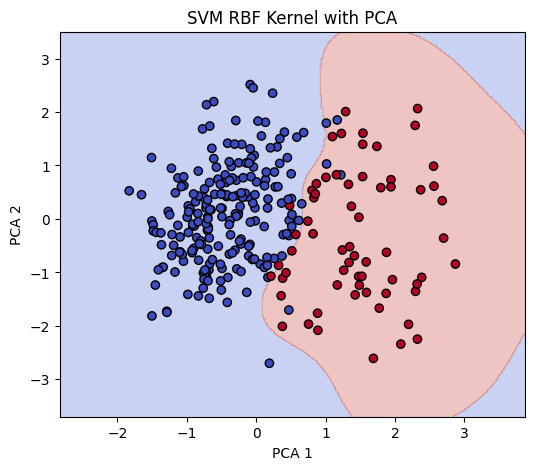

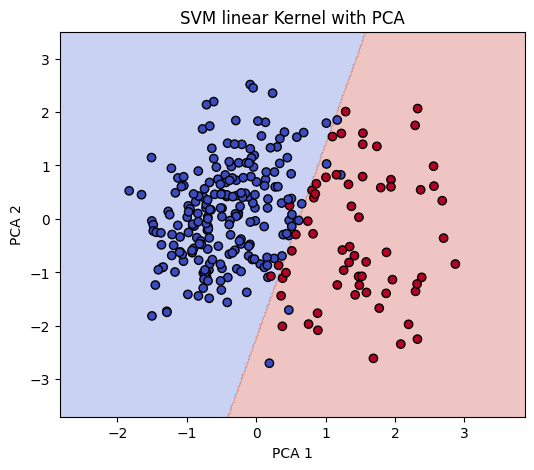

In [526]:
# 6️⃣ Visualize Decision Boundary
def plot_decision_boundary(clf, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.show()

plot_decision_boundary(cv_rbf.best_estimator_, x_train_pca, y_train, "SVM RBF Kernel with PCA")
plot_decision_boundary(cv_lin.best_estimator_, x_train_pca, y_train, "SVM linear Kernel with PCA")
 